## Exercise 4-2 

Load the image recorder.jpg. Convert to grayscale and compress the image using the FFT.

Code reference: [[databook_python]](https://github.com/dynamicslab/databook_python/blob/master/CH02/CH02_SEC01_1_FourierSines.ipynb)

## (a)

Design a compression threshold to keep exactly 10% of the original Fourier coefficients. Compute the L2 norm of the error between the new compressed image and the original image. Also compute the L2 norm of the Fourier transformed versions of the compressed and original images.


In [1]:
from numpy import linalg as LA
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os

### Load the originanl image and gray-scaled it

Text(0.5, 1.0, 'Original image')

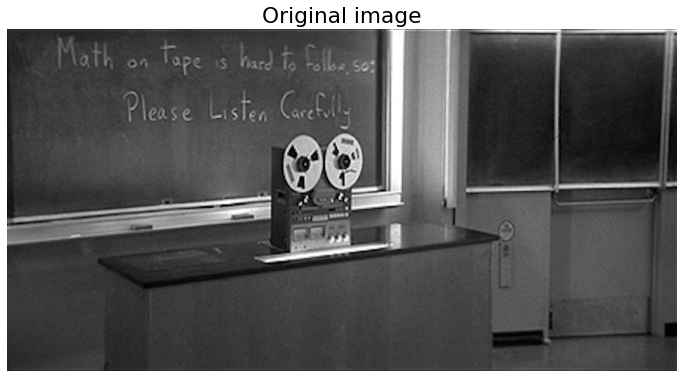

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread("recorder.jpeg")
B = np.mean(A, -1); # Convert RGB to grayscale
n = B.shape[0]*B.shape[1] # of samples in the original image

plt.figure()
plt.imshow(B,cmap='gray')
plt.axis('off')
plt.title('Original image')

### Do 2D FFT and commpressed the image

Text(0.5, 1.0, 'Compressed image: keep = 10.0%')

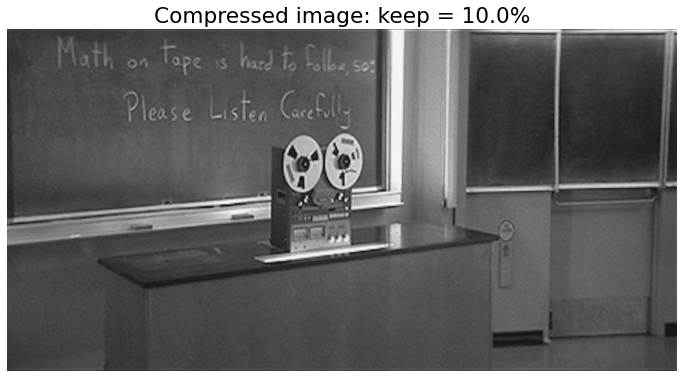

In [3]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
keep = 0.1
    
thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
ind = np.abs(Bt)>thresh          # Find small indices
Btlow = Bt * ind                 # Threshold small indices
Blow = np.fft.ifft2(Btlow).real  # Compressed image

# Print the commpressed image
plt.figure()
plt.imshow(Blow,cmap='gray')
plt.axis('off')
plt.title('Compressed image: keep = ' + str(keep*100) + '%')

### Compute L2 norm an check the error using L2 norm

In [4]:
# L2 norm 
NB = LA.norm(B, ord=2) # gray-scaled original img
NBt = LA.norm(Bt, ord=2)/np.sqrt(n) # FFT img
NBtlow = LA.norm(Btlow, ord=2)/np.sqrt(n) # compressed FFT img
NBlow = LA.norm(Blow, ord=2) # compressed img
print('L2 norm of gray-scaled original img:  ', NB)
print('L2 norm of gray-scaled compressed img:', NBlow)
print('L2 norm of FFT img:                   ', NBt)
print('L2 norm of compressed FFT img         ', NBtlow)
print('----------------------------------------------------------')

image_error = LA.norm((B-Blow), ord=2)/NB
FFT_image_error = LA.norm((Bt-Btlow), ord=2)/np.sqrt(n)/NBt
print('error between the compressed image and the original image:', image_error)
print('error between the FFT compressed image and the FFT image :', FFT_image_error)

L2 norm of gray-scaled original img:   105526.92014109949
L2 norm of gray-scaled compressed img: 105526.83856644596
L2 norm of FFT img:                    105526.92014109944
L2 norm of compressed FFT img          105526.83856644598
----------------------------------------------------------
error between the compressed image and the original image: 0.003057801349858109
error between the FFT compressed image and the FFT image : 0.003057801349858109


## (b)

Repeat for a compression that only keeps 1% of the original Fourier coefficients.

L2 norm of gray-scaled original img:   105526.92014109949
L2 norm of gray-scaled compressed img: 105517.44733398104
L2 norm of FFT img:                    105526.92014109944
L2 norm of compressed FFT img          105517.44733398105
----------------------------------------------------------
error between the compressed image and the original image: 0.014370021272522945
error between the FFT compressed image and the FFT image : 0.014370021272522964


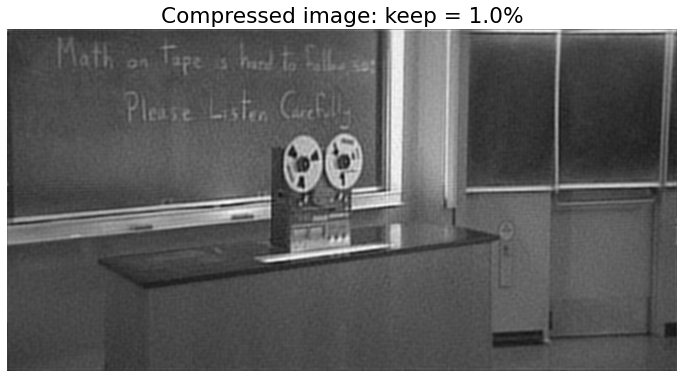

In [5]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
keep = 0.01
    
thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
ind = np.abs(Bt)>thresh          # Find small indices
Btlow = Bt * ind                 # Threshold small indices
Blow = np.fft.ifft2(Btlow).real  # Compressed image

# Print the commpressed image
plt.figure()
plt.imshow(Blow,cmap='gray')
plt.axis('off')
plt.title('Compressed image: keep = ' + str(keep*100) + '%')

# L2 norm 
NB = LA.norm(B, ord=2) # gray-scaled original img
NBt = LA.norm(Bt, ord=2)/np.sqrt(n) # FFT img
NBtlow = LA.norm(Btlow, ord=2)/np.sqrt(n) # compressed FFT img
NBlow = LA.norm(Blow, ord=2) # compressed img
print('L2 norm of gray-scaled original img:  ', NB)
print('L2 norm of gray-scaled compressed img:', NBlow)
print('L2 norm of FFT img:                   ', NBt)
print('L2 norm of compressed FFT img         ', NBtlow)
print('----------------------------------------------------------')

image_error = LA.norm((B-Blow), ord=2)/NB
FFT_image_error = LA.norm((Bt-Btlow), ord=2)/np.sqrt(n)/NBt
print('error between the compressed image and the original image:', image_error)
print('error between the FFT compressed image and the FFT image :', FFT_image_error)